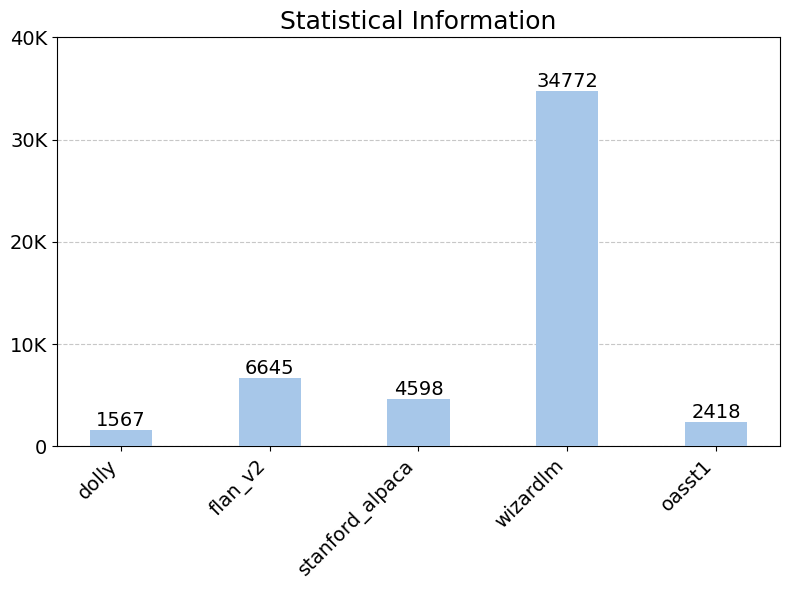

In [16]:
import os
import numpy as np
from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 选择一个模型
sorted_labels = ['dolly', 'flan_v2', 'stanford_alpaca', 'wizardlm', 'oasst1']

# 画布设置
fig, ax = plt.subplots(figsize=(8, 6))


data = load_dataset('json', data_files="selected_data/filtered-cured-50k_dataset.json")['train']

# 处理数据
dataset_proportion = ['wizardlm' if 'wizardlm' in item else item.rsplit('_', 1)[0] for item in data['id']]
counter = Counter(dataset_proportion)
counts = [counter.get(label, 0) for label in sorted_labels]

# 绘制柱状图
bar_width = 0.42
color = '#A7C7E9'
x = np.arange(len(sorted_labels))

bars = ax.bar(x, counts, bar_width, color=color, zorder=3)

# 显示数值
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(bar.get_height()), 
            ha='center', va='bottom', fontsize=14)

# 格式化 y 轴
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}M' if x >= 1e6 else 
                                           f'{x * 1e-3:.0f}K' if x >= 1e3 else f'{x:.0f}'))

ax.set_title(f'Statistical Information', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels, rotation=45, ha='right', fontsize=14)
ax.set_yticks(np.arange(0, max(counts) + 10000, 10000))
ax.tick_params(axis='y', labelsize=14)  

ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()
